In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

from sentence_transformers import SentenceTransformer
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

2024-01-14 00:42:30.878714: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
ITEM_EMBEDDING = os.path.join('dataset', 'item_embedding.pkl')

In [3]:
df_item_embedding = pd.read_pickle(ITEM_EMBEDDING)
df_item_embedding

,item_id,headline_embeddings,short_description_embeddings,concat_embeddings
0,0,"[-0.054995973, 0.10514701, 0.0009537986, -0.07...","[0.04689467, 0.089309394, -0.018575395, -0.029...","[-0.054995973, 0.10514701, 0.0009537986, -0.07..."
1,1,"[-0.020863444, 0.011131575, 0.0013632453, -0.0...","[0.017128233, -0.0062120855, 0.015252358, 0.02...","[-0.020863444, 0.011131575, 0.0013632453, -0.0..."
2,2,"[0.017761054, 0.053476874, 6.918786e-05, -0.03...","[0.10238154, 0.07736524, 0.0020822838, -0.0614...","[0.017761054, 0.053476874, 6.918786e-05, -0.03..."
3,3,"[-0.0029250348, 0.01137404, 0.0045979875, -0.0...","[0.04334459, 0.056244634, 0.0071496996, -0.057...","[-0.0029250348, 0.01137404, 0.0045979875, -0.0..."
4,4,"[-0.0049342206, 0.053551663, 0.027952224, -0.0...","[-0.0066743735, 0.03416268, -0.00058029604, 0....","[-0.0049342206, 0.053551663, 0.027952224, -0.0..."
...,...,...,...,...
209522,209522,"[0.041218493, -0.007820907, -0.01887703, -0.02...","[-0.029524302, -0.0045847334, -0.054970894, -0...","[0.041218493, -0.007820907, -0.01887703, -0.02..."
209523,209523,"[-0.047861934, -0.027825285, -0.0048302715, -0...","[0.03547541, -0.027677324, 0.019167567, -0.007...","[-0.047861934, -0.027825285, -0.0048302715, -0..."
209524,209524,"[-0.0816778, 0.022369152, 0.027179016, 0.02018...","[-0.020275101, 0.10664522, -0.007810726, -0.01...","[-0.0816778, 0.022369152, 0.027179016, 0.02018..."
209525,209525,"[-0.04274766, 0.12479968, -0.047635496, -0.057...","[0.044633802, 0.014033731, -0.004920267, -0.02...","[-0.04274766, 0.12479968, -0.047635496, -0.057..."


In [11]:
data = df_item_embedding["concat_embeddings"].values
data = np.array([i.tolist() for i in data])
data

array([[-5.49959727e-02,  1.05147012e-01,  9.53798590e-04, ...,
         5.32855615e-02, -2.23600236e-03, -1.47728063e-02],
       [-2.08634436e-02,  1.11315753e-02,  1.36324530e-03, ...,
         4.63344380e-02, -4.62139249e-02,  1.50982691e-02],
       [ 1.77610535e-02,  5.34768738e-02,  6.91878595e-05, ...,
         6.32509543e-03,  5.80797382e-02, -2.07067430e-02],
       ...,
       [-8.16778019e-02,  2.23691519e-02,  2.71790158e-02, ...,
         4.07958031e-02,  4.00512889e-02, -2.77843773e-02],
       [-4.27476615e-02,  1.24799684e-01, -4.76354957e-02, ...,
        -3.31232846e-02, -1.27753690e-02, -1.89356804e-02],
       [-2.68552154e-02, -3.47587094e-02, -2.69783847e-03, ...,
        -1.29792644e-02,  5.60445199e-03, -1.67311113e-02]])

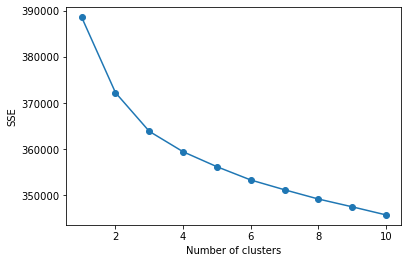

In [12]:
# 假設 data 是你的數據
sse = []
for k in tqdm(range(1, 20)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# 繪製肘部法圖形
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [13]:
silhouette_scores = []
for k in tqdm(range(2, 11)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# 繪製輪廓分析圖形
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


KeyboardInterrupt: 